<a href="https://colab.research.google.com/github/breannashi/Data_Science_Bootcamp/blob/ml-tutorial/ML_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning Tutorial - Bioinformatics Bootcamp 2022


## 1.&nbsp;Prerequisite Knowledge and Table of Contents

This course focuses on a machine learning tutorial for people working in bioinformatics. We start with a clean synthetic dataset and apply statistical models in clustering, regression, and classification with sklearn. This tutorial assumes a working knowledge of Python programming, linear algebra with NumPy, and Pandas for data analysis - especially the first two.




##2.&nbsp;Setting up data and packages


The datasets used in this tutorial were found in Kaggle. Kaggle is a website thats useful in finding datasets.

For the clustering and classification sections of this tutorial, we will be using the popular iris dataset. You can upload it using the link below but we will use the preloaded one in sklearn.

https://www.kaggle.com/datasets/himanshunakrani/iris-dataset?resource=download

This dataset gives information about the length and width of the petals and sepals of various iris species. You can use this information to cluster flowers based on these measurements. We can also use this information to classify flowers if the species was unknown.

For the regression section of this tutorial, we will be using the crab age prediction dataset, found here:

https://www.kaggle.com/datasets/sidhus/crab-age-prediction

This dataset has information about crab sex, length, diameter, height, weight, and age. You can use this informaiton to build a regression model to predict a crabs age based on certain parameters given, such as diameter and height.

You can use the links above to download these datasets to use in this tutorial.


In [1]:
#uploading files to colab
from google.colab import files
uploaded = files.upload()
#or use the folder icon on the left

In [3]:
#loading files from drive to colab
from google.colab import drive
drive.mount('/content/drive')

#this allows you to interface with your GDrive data using the left folder icon

Mounted at /content/drive


In [7]:
#imports
from sklearn import datasets #preloaded datasets
from sklearn import metrics #evaluation metrics
from sklearn import model_selection #model setup and hyperparameter tuning
import numpy as np #numerical analysis
import pandas as pd #just in case

##2.&nbsp;Clustering



###2.1&nbsp;Importing the clustering algorithms


In [8]:
#clustering algorithms
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
#as you can see, the writer is a fan of importing particular classes instead 
#of wholesale packages. If you are not from a computing background this is a
#good practice and will save you from frustration as projects get large

###2.2&nbsp;Exploratory Data Analysis

Even in unsupervised projects, data analysis is necessary. Many clustering algorithms are not robust for outlier data - manual analysis will help you with model selection and standardisation. It also helps you contextualise the data and results a little bit more.*italicized text*


In [ ]:
#load iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

#explore num features and num samples
print(X.shape[0]) #num samples
print(X.shape[1]) #num features
print(np.unique(y)) #num classes/clusters

#plot histogram of each feature - helps with outliers and shape
import matplotlib.pyplot as plt
for i in range(X.shape[1]):
    plt.hist(X[:,i])
    plt.title(iris.feature_names[i])
    plt.show()

#correlation matrix of features
from seaborn import heatmap
df = pd.DataFrame(X, columns=iris.feature_names)
heatmap(df.corr(), annot=True, cmap='coolwarm')


You can see the sepal distributions are a lot closer to Gaussian and that Sepal width contains a lot of information. Below is the KMeans clustering with three clusters (since we know this beforehand) and with other numbers (since we usually don't know things beforehand). 

###2.3&nbsp;Modeling and tuning

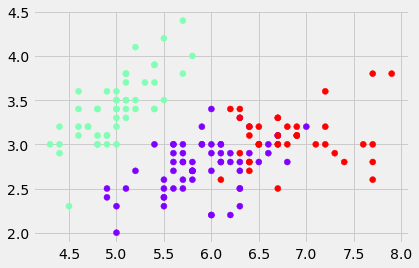

In [22]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='rainbow')


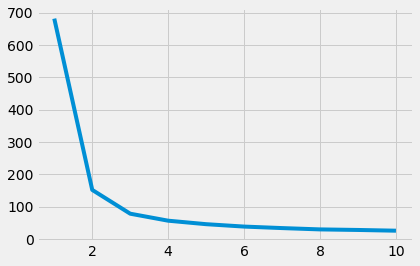

In [26]:
# A list holds the error values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)

What just happened? The first cell visualises the KMeans output for k = 3. We already know that there are three clusters so this works well. But we typically don't know this in unsupervised learning. How do we find the optimal value of this hyperparameter? The dominant method is elbow curve - you plot the error values with different values of k (the number of clusters) and plot the loss. The inflection (or elbow) point is the ideal number that maximises results while avoiding overfitting. 

By the way, how is loss calculated in unspervised learning? For KMeans, we take the sum of squared distances of samples from the centroid of their clusters. If special weights are provided for samples, we can also computer weighted sum. 